<a href="https://colab.research.google.com/github/hiro-isono/Colaboratory/blob/main/20210728work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference
https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ja/tutorials/keras/classification.ipynb

TF Kerasのインポート

In [1]:
# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

# ヘルパーライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


画像とラベルのインポート

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


4423680/4422102 [==============================] - 0s 0us/step


画像とラベルの表示

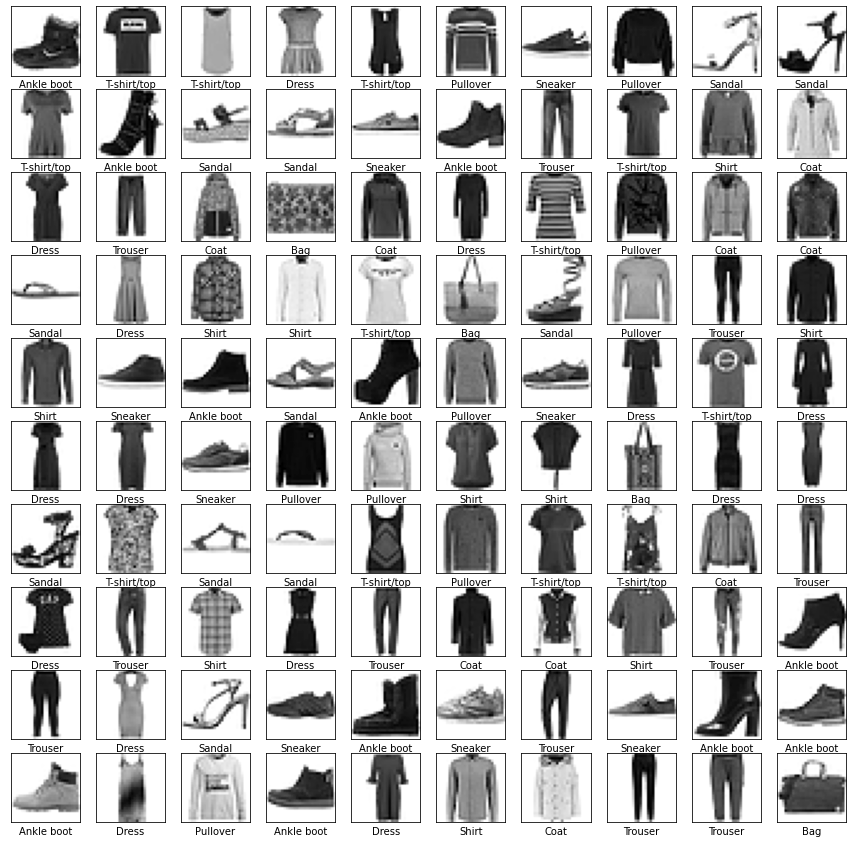

In [3]:
plt.figure(figsize=(15,15))

for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

##モデル構築
model = 入力 28x28, ReLU, Softmax

modelcompile = Adam, sparse_categorical_crossentropy, accuracy

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


##モデル訓練
 入力 train_images, train_labels : epoch数 = 5

In [5]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5008 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3775 - accuracy: 0.8630
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3380 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3129 - accuracy: 0.8839
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2945 - accuracy: 0.8923


##モデル評価


In [6]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3346 - accuracy: 0.8809

Test accuracy: 0.8809000253677368


##Inference 推論
入力画像

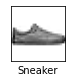

In [34]:
number_of_test_images = 12
inference_input_img = test_images[number_of_test_images]

plt.figure(figsize=(1,1))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(test_images[number_of_test_images], cmap=plt.cm.binary)
plt.xlabel(class_names[test_labels[number_of_test_images]])
plt.show()


推論実行

In [35]:
inference_input_img = (np.expand_dims(inference_input_img,0))

predictions = model.predict(inference_input_img)

推論結果　Labels[0] - [9] で一番値が大きいもの

In [36]:
predictions[0]

array([8.5870795e-07, 7.9249531e-09, 3.0358296e-07, 4.4397893e-07,
       7.4199966e-07, 6.8074667e-01, 3.1516450e-08, 2.8857812e-01,
       3.0671705e-02, 1.0336512e-06], dtype=float32)

In [37]:
np.argmax(predictions[0])

5

答え合わせ

In [38]:
test_labels[number_of_test_images]

7

##モデル保存
ref: https://www.tensorflow.org/guide/keras/save_and_serialize/

In [39]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


##保存モデルのリロード、推論

In [41]:
reconstructed_model = keras.models.load_model("my_model")
predictions = reconstructed_model.predict(inference_input_img)
predictions[0]

array([8.5870795e-07, 7.9249531e-09, 3.0358296e-07, 4.4397893e-07,
       7.4199966e-07, 6.8074667e-01, 3.1516450e-08, 2.8857812e-01,
       3.0671705e-02, 1.0336512e-06], dtype=float32)

##モデルのコンバート
ref: https://www.tensorflow.org/lite/convert/rnn